# $\renewcommand{\rmdefault}{ftm} Лабораторная\ работа\ №5.\ Гавриков\ А.\ С.$

## $\renewcommand{\rmdefault}{ftm} Электрон\ ускорен\ в\ режиме\ ГА\ до\ энергии\ =\ 5\ МэВ.\ Напряженность\ электрического\ СВЧ\ поля\  =\ 0,5\ кВ/см. Как\ затормозить\ электрон\ до\ энергии\ 20\ кэВ\ за\ кратчайшее\ время?\ Как\ изменятся\ параметры,\ необходимые\ для\ торможения\ электрона,\ если\ напряженность\ электрического\ СВЧ\ поля\ будет\ равна\ = 100\ В/см?$


In [1]:
import numpy as np
pi = np.pi
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
def fun_gam(gamma,fi,b, g0, alpha): 
    return -g0*(np.sqrt(1 - 1/gamma**2))*np.cos(fi) + 0.5*alpha*(1 - 1/(gamma**2))*(gamma/b)

def fun_fi(fi,gamma,b, g0): 
    return (b - gamma)/gamma + g0*((gamma**2 - 1)**(-0.5))*math.sin(fi) 

def rk_g(dy, y, fi, b, g0, dtay, alpha): 
    k1 = fun_gam(y, fi, b, g0, alpha) 
    k2 = fun_gam(y + dtay*0.5*k1, fi, b, g0, alpha) 
    k3 = fun_gam(y + dtay*0.5*k2, fi, b, g0, alpha) 
    k4 = fun_gam(y + dtay*k3, fi, b, g0, alpha) 
    dy = dy + (k1 + 2*k2 + 2*k3 + k4)*dtay/6 
    return dy

def rungekutt_fi(dy, y, gam, b, g0, dtay):
    k1 = fun_fi(y, gam, b, g0)
    k2 = fun_fi(y + dtay*0.5*k1, gam, b, g0)
    k3 = fun_fi(y + dtay*0.5*k2, gam, b, g0)
    k4 = fun_fi(y + dtay*k3, gam, b, g0)
    dy = dy + (k1 + 2*k2 + 2*k3 + k4)*dtay/6
    return dy

In [3]:
def res(fi, alpha, N=500, W0=5e6, B0=10, E0=5/3, stop=False):
    e = 4.8032e-10
    m = 9.10953e-28
    c = 3e10
    t = 0
    W0 = W0/6.242e+11
    omega = (e*B0)/(m*c)
    T = 1/omega
    tay = omega*t
    dtay = 1/50
    g0 = (e*E0)/(m*c*omega)
    b = 1
    gamma = W0/(m*c**2) + 1
    fi_list = []
    gamma_list = []
    tay_list = []
    b_list = []
    while (m*c**2)*(gamma-1)/(1.6e-9) < 5000:
        if tay > N:
            break
        fi_list.append(fi)
        gamma_list.append(gamma)
        tay_list.append(tay)
        b_list.append(b)
        gamma = rk_g(gamma, gamma, fi, b, g0, dtay, alpha)
        fi = rungekutt_fi(fi, fi, gamma, b, g0, dtay)
        b = 1 + alpha*tay
        tay += dtay
        
    fig, axes = plt.subplots(2, 1, figsize=(12, 10))            
    return axes[0].plot(tay_list, ((m*c**2)*(np.array(gamma_list)-1)/(1.6e-9))[::-1]),\
            axes[0].plot(tay_list, b_list[::-1]),\
            axes[1].plot(tay_list, fi_list[::-1]),\
            (m*c**2)*(np.array(gamma_list)-1)/(1.6e-9), np.array(tay_list)/omega, b_list, print(np.array(tay_list[-1])/omega)

# Случай №1. Начальные условия: 

## $\frac{db}{d\tau} = -0.003$

## $W_{0} = 5\cdot{10^6}\ эВ,$

## $B_{0} = 100\ Гс.,$

## $E_{0} = \frac{5}{3}\ СГСЭ.,$

1.8182456500443147e-06


<Figure size 800x560 with 0 Axes>

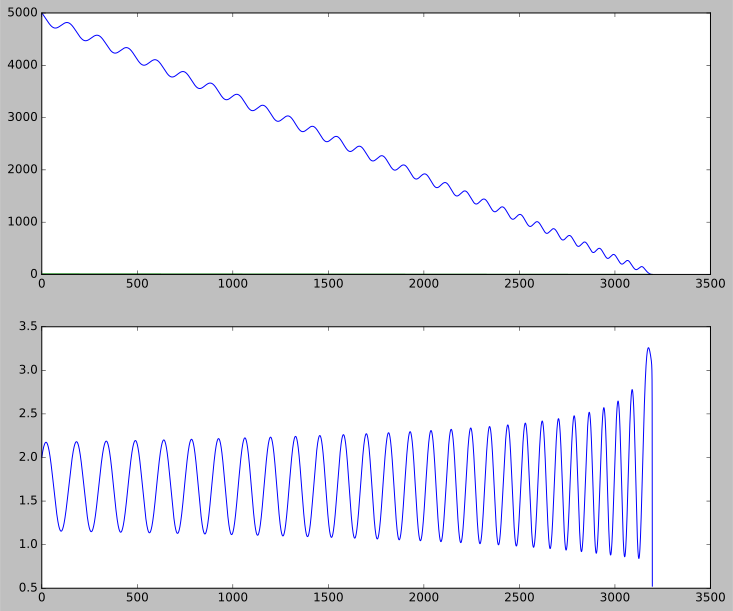

In [4]:
with plt.style.context('classic'):
    plt.figure(figsize=(10,7))
    func = res(pi/6, 0.003, N=5000, W0=20, B0=100, E0=5/3, stop=True)

# Случай №2. Начальные условия: 

## $\frac{db}{d\tau} = -0.005$

## $W_{0} = 5\cdot{10^6}\ эВ,$

## $B_{0} = 100\ Гс.,$

## $E_{0} = \frac{5}{3}\ СГСЭ.,$

1.109359139951688e-06


<Figure size 800x560 with 0 Axes>

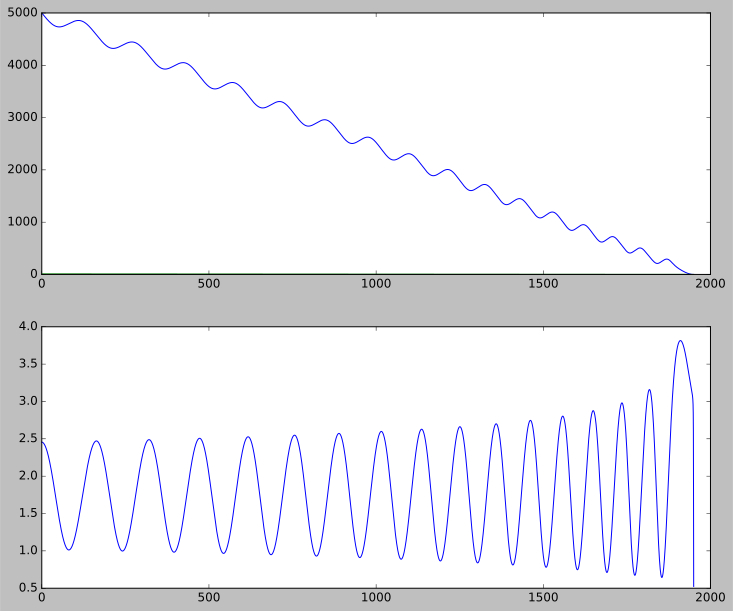

In [5]:
with plt.style.context('classic'):
    plt.figure(figsize=(10,7))
    func = res(pi/6, 0.005, N=5000, W0=20, B0=100, E0=5/3, stop=True)

# Случай №3. Начальные условия: 

## $\frac{db}{d\tau} = -0.001$

## $W_{0} = 5\cdot{10^6}\ эВ,$

## $B_{0} = 100\ Гс.,$

## $E_{0} = \frac{5}{3}\ СГСЭ.,$

5.478929397880727e-06


<Figure size 800x560 with 0 Axes>

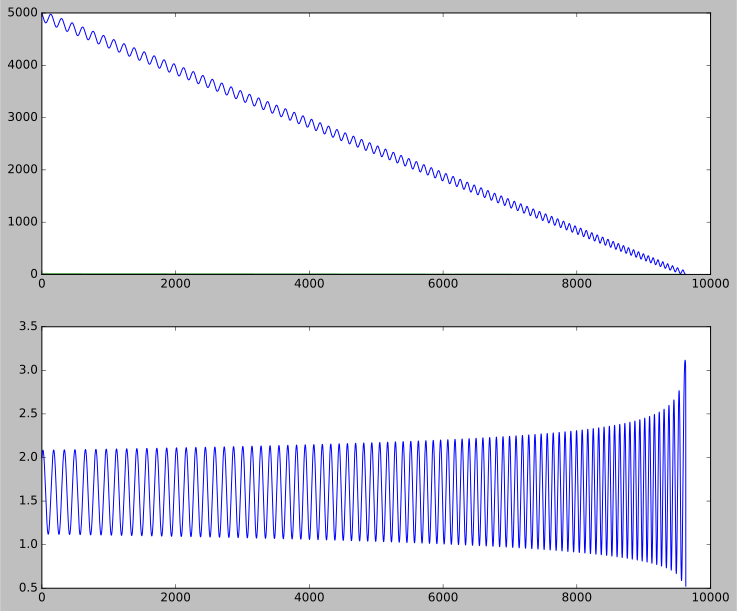

In [6]:
with plt.style.context('classic'):
    plt.figure(figsize=(10,7))
    func = res(pi/6, 0.001, N=10000, W0=20, B0=100, E0=5/3, stop=True)

# Случай №4. Начальные условия: 

## $\frac{db}{d\tau} = -0.00075$

## $W_{0} = 5\cdot{10^6}\ эВ,$

## $B_{0} = 100\ Гс.,$

## $E_{0} = \frac{5}{3}\ СГСЭ.,$

7.242793247661068e-06


<Figure size 800x560 with 0 Axes>

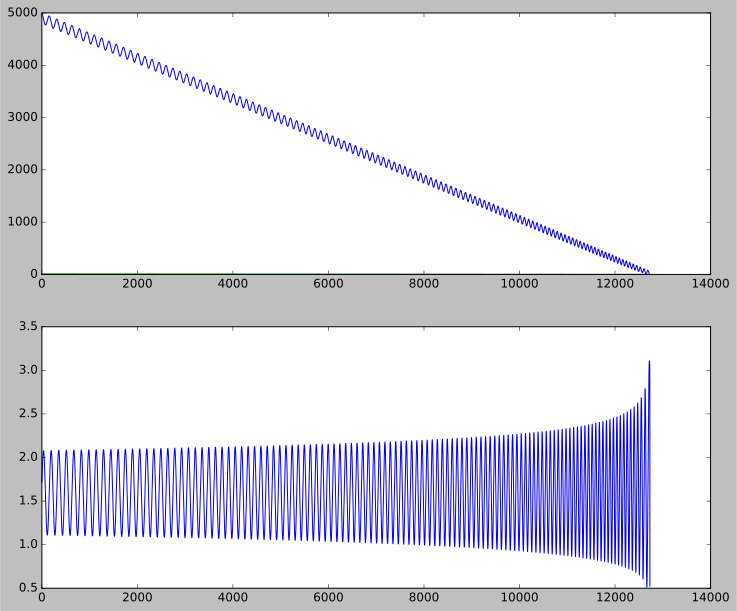

In [7]:
with plt.style.context('classic'):
    plt.figure(figsize=(10,7))
    func = res(pi/6, 0.00075, N=25000, W0=20, B0=100, E0=5/3, stop=True)

## $\renewcommand{\rmdefault}{ftm} Таким\ образом, самое\ быстрое\ уменьшение\ энергии\ до\ 20\ кэВ\ произошла\ в\ случае\ №2\ за \sim 2000\ периодов.\ (около\ 1\ микросекунд)$

## $\renewcommand{\rmdefault}{ftm}\ Как\ изменятся\ параметры,\ необходимые\ для\ торможения\ электрона,\ если\ напряженность\ электрического\ СВЧ\ поля\ будет\ равна\ = 100\ В/см?$

# Случай №2'. Начальные условия: 

## $\frac{db}{d\tau} = -0.01$

## $W_{0} = 5\cdot{10^6}\ эВ,$

## $B_{0} = 10\ Гс.,$

## $E_{0} = \frac{1}{3}\ СГСЭ.,$

## Чтобы вернуть колебания в режим гиромагнитного авторезонанса, можно уменьшить магнитное поле в 5 раз. 

5.546795699758441e-06


<Figure size 800x560 with 0 Axes>

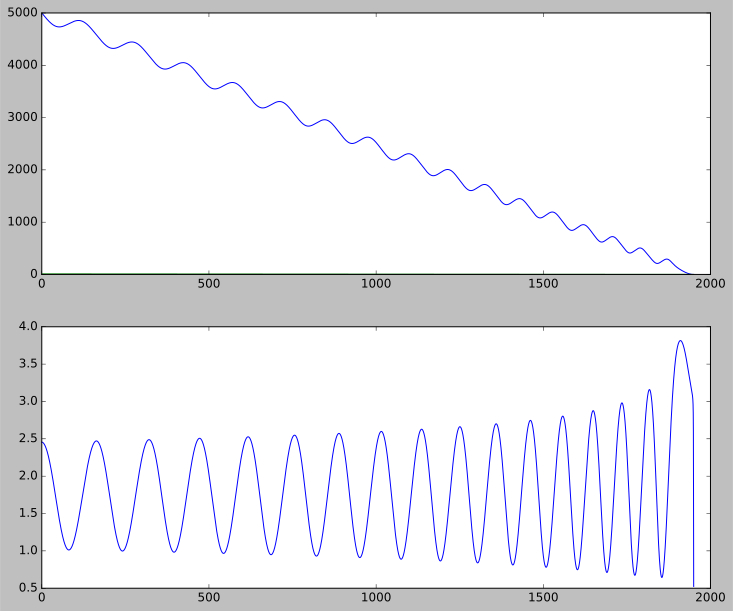

In [8]:
with plt.style.context('classic'):
    plt.figure(figsize=(10,7))
    func = res(pi/6, 0.005, N=2500, W0=20, B0=20, E0=1/3, stop=True)

## Или альфа.

7.112078926543327e-06


<Figure size 800x560 with 0 Axes>

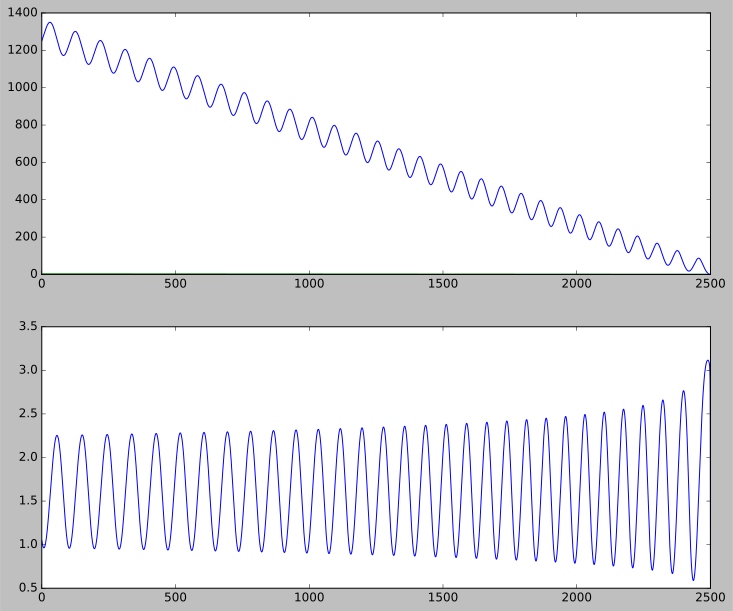

In [9]:
with plt.style.context('classic'):
    plt.figure(figsize=(10,7))
    func = res(pi/6, 0.001, N=2500, W0=20, B0=20, E0=1/3, stop=True)

In [10]:
! jupyter nbconvert --to html Chisl5.ipynb

[NbConvertApp] Converting notebook Chisl5.ipynb to html
[NbConvertApp] Writing 538781 bytes to Chisl5.html
